In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset



Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [7]:
# Unzip the downloaded dataset

import os
import zipfile

with zipfile.ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_disease_data")


Using device: cuda
Number of classes: 38


C:\Users\DSUCSCL7-29\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DSUCSCL7-29\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\DSUCSCL7-29/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97

Epoch 1, Loss: 1.2444, Val Accuracy: 0.8903


Epoch 2/10: 100%|██████████| 2197/2197 [1:13:07<00:00,  2.00s/it]     


Epoch 2, Loss: 0.8203, Val Accuracy: 0.9105


Epoch 3/10: 100%|██████████| 2197/2197 [08:18<00:00,  4.41it/s]


Epoch 3, Loss: 0.7361, Val Accuracy: 0.9138


Epoch 4/10: 100%|██████████| 2197/2197 [08:15<00:00,  4.43it/s]


Epoch 4, Loss: 0.6950, Val Accuracy: 0.9208


Epoch 5/10: 100%|██████████| 2197/2197 [08:15<00:00,  4.43it/s]


Epoch 5, Loss: 0.6799, Val Accuracy: 0.9204


Epoch 6/10: 100%|██████████| 2197/2197 [08:16<00:00,  4.42it/s]


Epoch 6, Loss: 0.6546, Val Accuracy: 0.9171


Epoch 7/10: 100%|██████████| 2197/2197 [08:15<00:00,  4.44it/s]


Epoch 7, Loss: 0.6343, Val Accuracy: 0.9262


Epoch 8/10: 100%|██████████| 2197/2197 [08:15<00:00,  4.43it/s]


Epoch 8, Loss: 0.6216, Val Accuracy: 0.9364


Epoch 9/10: 100%|██████████| 2197/2197 [08:16<00:00,  4.43it/s]


Epoch 9, Loss: 0.6083, Val Accuracy: 0.9242


Epoch 10/10: 100%|██████████| 2197/2197 [08:13<00:00,  4.45it/s]


Epoch 10, Loss: 0.5950, Val Accuracy: 0.9392


Testing: 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]


Predictions on the test set:
Image 1: Predicted class - Apple___Cedar_apple_rust
Image 2: Predicted class - Apple___Cedar_apple_rust
Image 3: Predicted class - Apple___Cedar_apple_rust
Image 4: Predicted class - Apple___Cedar_apple_rust
Image 5: Predicted class - Cherry_(including_sour)___Powdery_mildew
Image 6: Predicted class - Apple___Apple_scab
Image 7: Predicted class - Apple___Apple_scab
Image 8: Predicted class - Corn_(maize)___Common_rust_
Image 9: Predicted class - Corn_(maize)___Common_rust_
Image 10: Predicted class - Corn_(maize)___Common_rust_


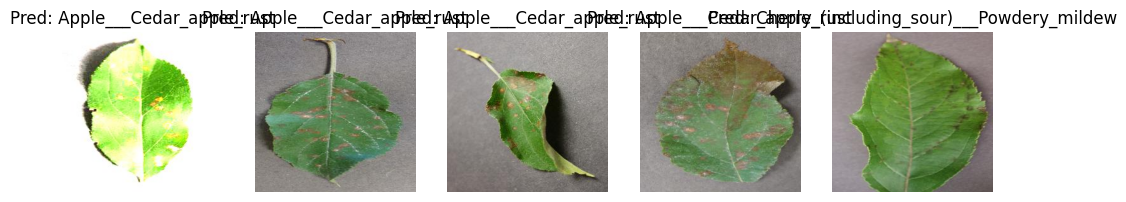

Final trained model saved to: final_resnet_model.pth


In [14]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# ============================
# Step 1: Configuration
# ============================

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Correct data paths based on your structure
train_path = "plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
val_path = "plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "plant_disease_data/test/test"  # Directory containing test images

# Define transforms (augmentation for training, normalization for validation/test)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder(root=train_path, transform=train_transform)
val_dataset = ImageFolder(root=val_path, transform=val_test_transform)

num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
class_names = train_dataset.classes

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# ============================
# Step 2: Define a custom Dataset for the test data
# ============================

class SimpleImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        # Return image and a dummy label (or None if you don't need it)
        return image, -1 # -1 as a placeholder for no label

test_dataset = SimpleImageDataset(img_dir=test_dir, transform=val_test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ============================
# Step 3: Load and Modify ResNet50
# ============================

resnet = models.resnet50(pretrained=True)
# Freeze all layers initially
for param in resnet.parameters():
    param.requires_grad = False

# Replace the final fully connected layer for your number of classes
num_features = resnet.fc.in_features
resnet.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

resnet = resnet.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=0.001)

# ============================
# Step 4: Training Loop (same as before)
# ============================

num_epochs = 10  # Start with 10 epochs, increase if needed
best_acc = 0.0

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    resnet.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {val_acc:.4f}")

    # Save best model based on validation accuracy
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(resnet.state_dict(), "best_resnet_model.pth")

# ============================
# Step 5: Test the Model (modified for unlabeled data)
# ============================

resnet.load_state_dict(torch.load("best_resnet_model.pth"))
resnet.eval()
test_preds = []
with torch.no_grad():
    for inputs, _ in tqdm(test_loader, desc="Testing"): # No labels in test_loader
        inputs = inputs.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())

print("Predictions on the test set:")
for i in range(min(10, len(test_preds))): # Print first 10 predictions
    print(f"Image {i+1}: Predicted class - {class_names[test_preds[i]]}")

# Optional: Visualize some predictions (if you have access to the original images)
if hasattr(test_dataset, 'img_files'):
    plt.figure(figsize=(12, 6))
    for i in range(min(5, len(test_dataset))):
        plt.subplot(1, 5, i + 1)
        img = Image.open(test_dataset.img_files[i]).convert('RGB')
        img_tensor = val_test_transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            output = resnet(img_tensor)
            _, predicted = torch.max(output, 1)
        plt.imshow(img)
        plt.title(f"Pred: {class_names[predicted[0]]}")
        plt.axis('off')
    plt.show()

# ============================
# Step 6: Save the Final Trained Model
# ============================
final_model_path = "final_resnet_model.pth"
torch.save(resnet.state_dict(), final_model_path)
print(f"Final trained model saved to: {final_model_path}")

In [18]:
# ============================
# Step 7: Test the Model
# ============================

resnet.load_state_dict(torch.load("best_resnet_model.pth"))
resnet.eval()
test_preds = []
test_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_acc = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.0000


--- Debugging Test Data Loading (SimpleImageDataset) ---
Test directory: plant_disease_data/test/test
Number of test samples: 33
Number of test batches: 2

--- Loading Model ---
Model loaded successfully.


Testing: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


--- Predictions ---
Image 1: Predicted class index - 2
             Predicted class name  - Apple___Cedar_apple_rust
Image 2: Predicted class index - 2
             Predicted class name  - Apple___Cedar_apple_rust
Image 3: Predicted class index - 2
             Predicted class name  - Apple___Cedar_apple_rust
Image 4: Predicted class index - 2
             Predicted class name  - Apple___Cedar_apple_rust
Image 5: Predicted class index - 5
             Predicted class name  - Cherry_(including_sour)___Powdery_mildew
Image 6: Predicted class index - 0
             Predicted class name  - Apple___Apple_scab
Image 7: Predicted class index - 0
             Predicted class name  - Apple___Apple_scab
Image 8: Predicted class index - 8
             Predicted class name  - Corn_(maize)___Common_rust_
Image 9: Predicted class index - 8
             Predicted class name  - Corn_(maize)___Common_rust_
Image 10: Predicted class index - 8
             Predicted class name  - Corn_(maize)___Common_r

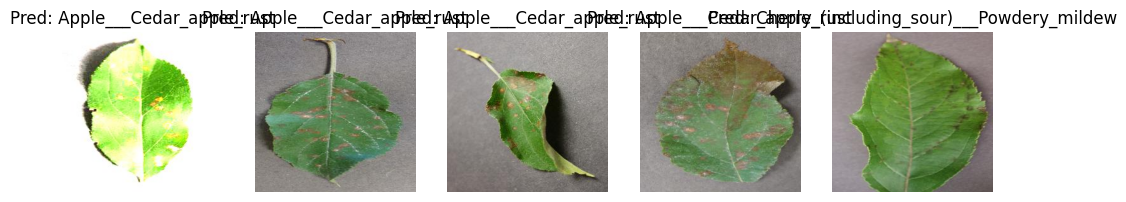

In [20]:
# ============================
# Step 4: Test the Model (Debugging for SimpleImageDataset)
# ============================

print("--- Debugging Test Data Loading (SimpleImageDataset) ---")
print(f"Test directory: {test_dir}")
test_dataset = SimpleImageDataset(img_dir=test_dir, transform=val_test_transform)
print(f"Number of test samples: {len(test_dataset)}")
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
print(f"Number of test batches: {len(test_loader)}")

print("\n--- Loading Model ---")
try:
    resnet.load_state_dict(torch.load("best_resnet_model.pth"))
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'best_resnet_model.pth' not found. Make sure training was completed and the file was saved.")
    exit()
except RuntimeError as e:
    print(f"Error loading model: {e}")
    exit()

resnet.eval()
test_preds = []
with torch.no_grad():
    for inputs, _ in tqdm(test_loader, desc="Testing"): # No labels to unpack
        inputs = inputs.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())

print("\n--- Predictions ---")
for i in range(min(10, len(test_preds))):
    print(f"Image {i+1}: Predicted class index - {test_preds[i]}")
    print(f"             Predicted class name  - {class_names[test_preds[i]]}") # Use class_names from training

# If you have true labels for the test set (even if not in subfolders), you'll need to load them separately
# and then you can calculate accuracy and other metrics.

# If you don't have true labels, you can't calculate accuracy directly.
# You would typically use these predictions for further analysis or application.

# Optional: Visualize some predictions
if hasattr(test_dataset, 'img_files'):
    plt.figure(figsize=(12, 6))
    for i in range(min(5, len(test_dataset))):
        plt.subplot(1, 5, i + 1)
        img = Image.open(test_dataset.img_files[i]).convert('RGB')
        img_tensor = val_test_transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            output = resnet(img_tensor)
            _, predicted = torch.max(output, 1)
        plt.imshow(img)
        plt.title(f"Pred: {class_names[predicted[0]]}")
        plt.axis('off')
    plt.show()

# ============================
# Step 6: Save the Final Trained Model (already in your code)
# ============================